<a href="https://colab.research.google.com/github/everval/AQM2021/blob/main/Simpsons_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: The Simpsons Ratings

Today, we are going to discuss some fundamental statistical concepts with an example with real data.

As usual, we start by loading the Python packages that we are going to use in the analysis.

In [ ]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs
import random as rnd #Package for random number generation
from scipy.stats import norm #Import the Normal distribution from the scipy.stats package
from scipy.stats import t #Import the t distribution from the scipy.stats package

Over the years, I have had a discussion with friends and colleagues about **is The Simpsons a good show**. 

To give the discussion some objective dimension, we decided to **collect some data** look at the ratings from episodes along the years (There are 31 seasons and counting!). The data comes from "ratingraph.com" and it is saved in the ‘Simpsons_Ratings.csv’ file.

We upload the file to Google Collab with the following code.

In [ ]:
from google.colab import files

uploaded = files.upload()
simpsons = pd.read_csv('Simpsons_ratings.csv')
print(simpsons)

Saving Simpsons_ratings.csv to Simpsons_ratings.csv
     Season  Episode                                Title  Year  Votes  Rating
0         1        1    Simpsons Roasting on an Open Fire  1989   6681     8.2
1         1        2                      Bart the Genius  1990   4358     7.7
2         1        3                      Homer's Odyssey  1990   3828     7.4
3         1        4        There's No Disgrace Like Home  1990   3785     7.7
4         1        5                     Bart the General  1990   4054     8.0
..      ...      ...                                  ...   ...    ...     ...
700      32       18                         Burger Kings  2021    323     6.9
701      32       19  Panic on the Streets of Springfield  2021    425     6.2
702      32       20             Mother and Child Reunion  2021    291     7.2
703      32       21            The Man from G.R.A.M.P.A.  2021    253     6.5
704      32       22                  The Last Barfighter  2021    301     7.7


The dataset includes season, number of episode, title, year, votes (number of people rating the episode), and rating. 

The data is presented in ascending order through the years.

The file contains ratings for all Simpsons episodes to date. If the Simpsons were to be cancelled tomorrow, the data would consists of the **population**. 

Nonetheless, as more episodes are already in production, even this large amount of data is a **sample** from the Simpsons ratings.

We can get a sense of the trajectory of the show by looking at the rating through time. That is, we create a **time series**.

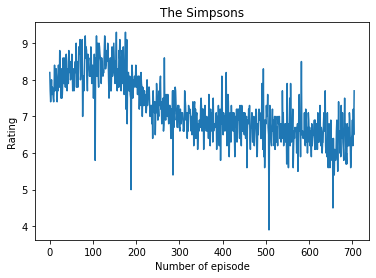

In [ ]:
n1 = simpsons.shape[0]
numeps = list(range(n1))
plt.plot(numeps,simpsons['Rating'])
plt.xlabel('Number of episode')
plt.ylabel('Rating')
plt.title("The Simpsons")
plt.show()

Another way this to present the different ratings is to construct an histogram.

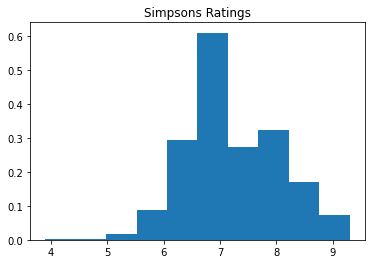

In [ ]:
plt.hist(simpsons['Rating'],bins=10,density=True)
plt.title('Simpsons Ratings')
plt.show()

The histogram is concentrated more towards the high ratings. Which gives more evidence that there seems to be more good episodes than bad.

The limitation of looking at ratings for all episodes is that it can be hard to make decisions. 

Hence, we compute some measurements of the data that allow us to make better decisions. That is, computing a *representative* number.

The most common tests between samples is to compare their *central tendencies*. That is, how an episode in *the middle* compares between shows. The most common measure is the **mean**, found by adding all data points and dividing by the number of data points. 

Furthermore, recall that there are many sources of uncertainty regarding these quantities. We know that the **standard deviation** is a measure of the uncertainty.

We use these quantities in formal statistical tools.

In [ ]:
mean_simpsons = np.mean(simpsons['Rating'])
std_simpsons = np.std(simpsons['Rating'])

display([mean_simpsons,std_simpsons])

[7.197446808510636, 0.8418448200656555]

## Small Sample

Up to this point, we have worked with the whole dataset, the 700+ observations. For most real data applications, this would be considered almost unreasonable  large given the high costs associated to obtain real data.

Thus, for an example closer to real life, we work now with a more reasonable sample size by selecting a subsample. Doing so will also allow us to compare our results from the small sample against the large one.

Imagine that we have to watch every episode to obtain the rating. It would be extremely expensive (in terms of time at least) to watch all the episodes. 

Thus, we may decide to just randomly pick a smaller subset of the episodes and do our analysis considering the smaller dataset.

In [ ]:
samsize = 10
sample = simpsons['Rating'].sample(n=samsize)

The analysis can then proceed as before just adjusting for the smaller sample size. 

In practical terms, it will mean more uncertainty and thus bigger confidence intervals and standard deviation.

Nonetheless, the analysis is as valid as with the whole dataset only at a fraction of the cost.

We compute the sample mean and standard deviation.

In [ ]:
mean_sample = np.mean(sample)
std_sample = np.std(sample)

display([mean_sample,std_sample])

[7.2299999999999995, 0.8485870609430715]

## Central Limit Theorem and Law of Large Numbers

The uncertainty regarding the sample mean can be modelled by a probability distribution. 

The **CLT tells us that this distribution is the Normal distribution** given by:
$$\bar{X}\sim N(\mu,\frac{\sigma}{\sqrt{n}}),$$
where $\mu$ and $\sigma$ are the mean and standard deviation of the data.

In general, **we do not know the mean and standard deviation of the data Nonetheless, using the LLN, we can estimate them using their sample equivalents**.
$$\bar{X}\approx \mu,\quad \text{and}\quad s\approx \sigma.$$

Hence, we have got all the elements to write the distribution of the sample mean.

In [ ]:
mean_dist = mean_sample
std_dist = std_sample/np.sqrt(samsize)

display([mean_dist,std_dist])

[7.2299999999999995, 0.2683467905528218]

We can compare this distribution against the one obtained if we use all the data.

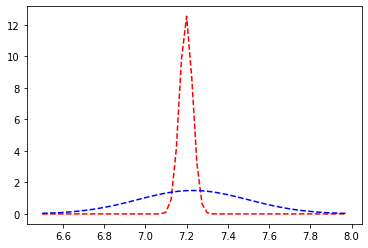

In [ ]:
mean_dist_all = mean_simpsons
std_dist_all = std_simpsons/np.sqrt(n1)

vals = np.arange(6.5,8,0.025)
nor_vals_all = norm.pdf(vals,loc=mean_dist_all,scale=std_dist_all) #Evaluating the Normal
nor_vals_dist = norm.pdf(vals,loc=mean_dist,scale=std_dist) #Evaluating the Normal
plt.plot(vals,nor_vals_all,color="red",linestyle="--") #Adding the theoretical density
plt.plot(vals,nor_vals_dist,color="blue",linestyle="--") #Adding the theoretical density
plt.show()

# Confidence Intervals

We construct a confidence interval by using the distribution of the parameter of interest.

From the Normal distribution, we know that a good mass of the probability is around the mean or location parameter. This allows us to construct intervals that contain $Z\%$ of the probability.

In the general formulation, we construct a $(1-\alpha)$ confidence interval by finding $Z_\alpha$ such that
$$[\mu-Z_\alpha\sigma,\mu+Z_\alpha\sigma],$$
contains $(1-\alpha)$ of the probability.

It is more common to write the confidence interval as
$$\mu \pm Z_\alpha \sigma.$$

We construct the confidence interval for the sample mean of the Simpsons sample where we do not know the standard deviation.

The t distribution is symmetrical, so we need to find $Z_{\alpha/2}$ such that $(1-\alpha/2)$ of the distribution is above it.

In [ ]:
z_alpha = t.ppf(0.975,df=samsize)  #Percent point function: it finds the value such that 
                #the percentage is achieved.
display(z_alpha)

2.2281388519649385

We compute the confidence interval.

In [ ]:
lim_inf_sample = mean_dist-z_alpha*std_dist  #CI
lim_sup_sample = mean_dist+z_alpha*std_dist

display([lim_inf_sample, lim_sup_sample])

[6.632086090169159, 7.82791390983084]

A much larger confidence interval given that we use a much smaller dataset. 

Nonetheless, notice that the sample mean computed with the whole dataset is contained inside.

Suppose we call it a good show if it gets a rating of 7.5 or above. Our null hypothesis would be then:

> $H_0: \overline{SimpsonsRatings}\geq 7.5$ 

against the alternative

> $H_a: \overline{SimpsonsRatings}< 7.5$ 

Notice that this is actually a **one-tailed** test. 

First, we construct the statistic of the test:
$$t_0 = \frac{\overline{SimpsonsRatings}-7.5}{\frac{s}{\sqrt{n}}},$$

where $s$ is our estimate of the standard deviation.


In [ ]:
t_0 = (mean_dist-7.5)/(std_dist)  #Compute the tests statistic
display(t_0)

-1.0061607200286349

Which we compare against the critical value.

In [ ]:
z_alpha_1side = t.ppf(0.05,df=samsize)  #Critical value from the oercent point function

display(z_alpha_1side)

-1.8124611228107341

Alternatively, or additionally, we can compute the **p-value** of the test by computing the probability of observing the value in the sample under the assumption that the rating is 7.5

In [ ]:
t.pdf(t_0,df = samsize)   #Evaluating the p-value

0.2289436056618496

Which tells us that by watching only 10 episodes of the Simpsons we are unable to reject **with statistical confidence** that the Simpsons is a good show.

As we saw with the complete dataset, we would need to watch many more episodes.